In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import gc

from tqdm.auto import tqdm
import sklearn

In [ ]:
from sklearn.datasets import fetch_california_housing
fetch_california_housing(as_frame=True)

data = fetch_california_housing(as_frame=True)['frame'] #원본 데이터

In [ ]:
fetch_california_housing(as_frame=True)['data'] #x
fetch_california_housing(as_frame=True)['target'] #y
print(fetch_california_housing(as_frame=True)['DESCR']) #description, data 설명

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
## EDA 수행 순서

# 1. info()로 기본적인 크기 확인
# 2. 결측치 체크 - 머신러닝에서는 결측치가 있으면 안돌아간다. 반드시 체크하고 넣어줄거면 넣어주고, 드랍할거면 드랍해야 한다.
# 3. dtype이 object인 column 확인 (dtype이 object라는 건, 숫자가 아닌 텍스트와 같은 경우) ---> categorial feature(구분/종류/성별 등) 일 가능성이 높아서!
# 4. target value의 distribution 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<Axes: xlabel='MedHouseVal', ylabel='Count'>

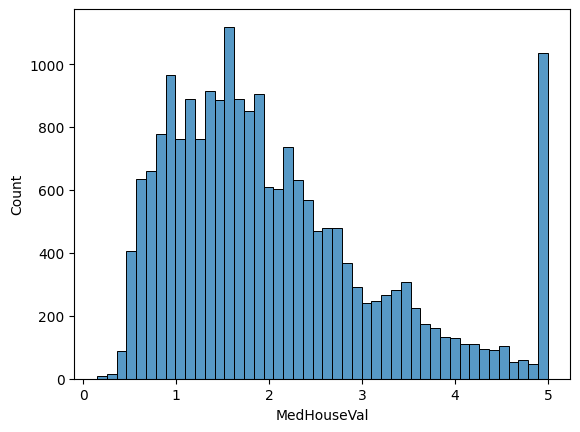

In [ ]:
data.info()
sns.histplot(data=data, x="MedHouseVal")

In [ ]:
# data preparation
X = data.drop(columns=["MedHouseVal"]) # feature vector
y = data.MedHouseVal                   # target value

# data split (train - val - test) = 8 : 1 : 1
from sklearn.model_selection import train_test_split

# 트테트테 (이 순서 자주 까먹는단다. 기억해봐)
# random_state 을 해주지 않으면 계속 바뀌니깐, 고정하기 위해 state 값을 지정해주라 한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # reproducibility
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# train - val = 8 : 1
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2064, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(16512, 8) (2064, 8) (2064, 8) (16512,) (2064,) (2064,)


In [ ]:
## sklearn 에서의 학습 방법
# sklearn 에서는 모든 모델이 학습하는 방법이 똑같다.? 동일하다.?
# 아 플로우가 동일하다라는 거네

# 선형!

# 1. 사용할 모델을 불러온다.
from sklearn.linear_model import LinearRegression
# 2. 모델을 선언한다.
reg = LinearRegression()
# 3. fit
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 앙상블을 써보자

# 1. 사용할 모델을 불러온다.
from sklearn.ensemble import RandomForestRegressor
# 2. 모델을 선언한다.
reg = RandomForestRegressor()
# 3. fit
reg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# xgboost
# 1. 사용할 모델을 불러온다.
from xgboost import XGBRegressor
# 2. 모델을 선언한다.
reg = XGBRegressor()
# 3. fit
reg.fit(X_train, y_train)

In [ ]:
# KMeans
# 1. 사용할 모델을 불러온다.
from sklearn.cluster import KMeans
# 2. 모델을 선언한다.
reg = KMeans()
# 3. fit - KMeans는 unsupervised learning 이므로 X_train 만 쓴다.
reg.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
# 이렇듯 코드는 쉽다.
# 그런데, 성능을 올리기는 어렵다.

In [ ]:
## 다시 선형회귀로 돌아오자.

# 1. 사용할 모델을 불러온다.
from sklearn.linear_model import LinearRegression
# 2. 모델을 선언한다.
reg = LinearRegression()
# 3. fit
reg.fit(X_train, y_train)

array([ 4.43258189e-01,  9.82322371e-03, -1.09834193e-01,  6.48603590e-01,
       -5.32336210e-06, -4.08451479e-03, -4.16214121e-01, -4.26975016e-01])

In [ ]:
# coefficient 출력
reg.coef_ # coefficient(weights, w)

In [ ]:
reg.intercept_ # weight(b)

-36.24610125996265

In [ ]:
# 검증
from sklearn.metrics import mean_squared_error
preds = reg.predict(X_val)
preds

mean_squared_error(y_val, preds, squared=False) # Root Mean Squared Error(RMSE)

0.7391936187902854

In [ ]:
# 저 0.73 이 과연 좋은 수치인가?
# train 데이터와 한번 비교해보자

train_preds = reg.predict(X_train)

print("Train RMSE : %.4f" % mean_squared_error(y_train, train_preds, squared=False))
print("Validation RMSE : %.4f" % mean_squared_error(y_val, preds, squared=False))

Train RMSE : 0.7193
Validation RMSE : 0.7392


NameError: name 'r2_score' is not defined

In [ ]:
# overfitting이 아닌가? r2 r2_score 확인?
from sklearn.metrics import r2_score

print("Train R^2 : %.4f" % r2_score(y_train, train_preds))
print("Validation R^2 : %.4f" % r2_score(y_val, preds))

Train R^2 : 0.6132
Validation R^2 : 0.5732


In [ ]:
# 음 모르겠군. random forest로 봐보자.
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

preds = reg.predict(X_val)
train_preds = reg.predict(X_train)
print("Train RMSE : %.4f" % mean_squared_error(y_train, train_preds, squared=False))
print("Validation RMSE : %.4f" % mean_squared_error(y_val, preds, squared=False))

print("Train R^2 : %.4f" % r2_score(y_train, train_preds))
print("Validation R^2 : %.4f" % r2_score(y_val, preds))

Train RMSE : 0.1887
Validation RMSE : 0.5143
Train R^2 : 0.9734
Validation R^2 : 0.7934


In [ ]:
# Train R^2 가 0.97인데, 검증이 0.79?? 이게 봐로 overfitting 이야
# 좀 과도하니 변수를 조정해서 해보자.
reg = RandomForestRegressor(max_depth=5)
reg.fit(X_train, y_train)

preds = reg.predict(X_val)
train_preds = reg.predict(X_train)
print("Train RMSE : %.4f" % mean_squared_error(y_train, train_preds, squared=False))
print("Validation RMSE : %.4f" % mean_squared_error(y_val, preds, squared=False))

print("Train R^2 : %.4f" % r2_score(y_train, train_preds))
print("Validation R^2 : %.4f" % r2_score(y_val, preds))

Train RMSE : 0.6534
Validation RMSE : 0.6888
Train R^2 : 0.6809
Validation R^2 : 0.6294


In [ ]:
# 자 이제 조정도 해봤으니, Test를 해보자

print("Test RMSE : %.4f" % mean_squared_error(y_test, reg.predict(X_test), squared=False))
print("Test R^2 : %.4f" % r2_score(y_test, reg.predict(X_test)))

Test RMSE : 0.6896
Test R^2 : 0.6434


In [ ]:
cd /content/ai-lab